## Ridge Regression

In [90]:
from random import sample
from warnings import filterwarnings
filterwarnings('ignore')

## Read the dataset

In [91]:
import pandas as pd
df = pd.read_csv('Datasets/Cars93.csv')
df.head()

,Id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Seperate the X and Y

In [92]:
X= df.drop(columns=['Id','Weight'])
Y = df[['Weight']]
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [93]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


## seperate the categorical and continuos features

In [94]:
from PM6func import catconsep
cat, con = catconsep(X)
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [95]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

## Preprocess the data

In [96]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                               ('scaler',StandardScaler())])

cat_pipeline = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                               ('Ohe',OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num', num_pipeline, con),
                         ('cat', cat_pipeline, cat)])
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [97]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[-0.48578741, -0.37572014, -0.28246529, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38801699,  1.49784409,  1.53140881, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00865782,  0.99822696,  0.94805231, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66378585,  0.39452293,  0.16416702, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53733279,  0.33207079,  0.14593713, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.88220476,  0.7484184 ,  0.60168439, ...,  0.        ,
         0.        ,  1.        ]], shape=(93, 256))

In [98]:
cols =pre.get_feature_names_out()
cols

array(['num__Min.Price', 'num__Price', 'num__Max.Price', 'num__MPG.city',
       'num__MPG.highway', 'num__EngineSize', 'num__Horsepower',
       'num__RPM', 'num__Rev.per.mile', 'num__Fuel.tank.capacity',
       'num__Passengers', 'num__Length', 'num__Wheelbase', 'num__Width',
       'num__Turn.circle', 'num__Rear.seat.room', 'num__Luggage.room',
       'cat__Manufacturer_Acura', 'cat__Manufacturer_Audi',
       'cat__Manufacturer_BMW', 'cat__Manufacturer_Buick',
       'cat__Manufacturer_Cadillac', 'cat__Manufacturer_Chevrolet',
       'cat__Manufacturer_Chrylser', 'cat__Manufacturer_Chrysler',
       'cat__Manufacturer_Dodge', 'cat__Manufacturer_Eagle',
       'cat__Manufacturer_Ford', 'cat__Manufacturer_Geo',
       'cat__Manufacturer_Honda', 'cat__Manufacturer_Hyundai',
       'cat__Manufacturer_Infiniti', 'cat__Manufacturer_Lexus',
       'cat__Manufacturer_Lincoln', 'cat__Manufacturer_Mazda',
       'cat__Manufacturer_Mercedes-Benz', 'cat__Manufacturer_Mercury',
       'cat__Man

In [99]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

In [100]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=10)
xtrain.shape

(74, 256)

In [101]:
ytrain.shape

(74, 1)

In [102]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:
from PM6func import evaluate_model
evaluate_model(xtrain, xtest, ytrain, ytest, model)

Metrics of Train Data
MSE: 0.00
MAE: 0.00
RMSE: 0.00
R2: 1.00


Metrics of Test Data
MSE: 35017.14
MAE: 142.93
RMSE: 187.13
R2: 0.85


In [104]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=4)
rr.fit(xtrain, ytrain)
evaluate_model(xtrain, xtest, ytrain, ytest, rr)

Metrics of Train Data
MSE: 3749.14
MAE: 46.25
RMSE: 61.23
R2: 0.99


Metrics of Test Data
MSE: 26355.54
MAE: 128.16
RMSE: 162.34
R2: 0.89


## Alphas value

In [105]:
import numpy as np

alphas = np.arange(0.1, 100, 0.1)
alphas

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [106]:
from sklearn.metrics import mean_squared_error
tr =[]
ts =[]
for i  in alphas:
    rr = Ridge(alpha=i)
    rr.fit(xtrain, ytrain)
    ypred_tr = rr.predict(xtrain)
    ypred_ts = rr.predict(xtest)

    tr.append(mean_squared_error(ytrain, ypred_tr))
    ts.append(mean_squared_error(ytest, ypred_ts))


In [107]:
tr[0:5]

[12.65681060716511,
 46.94902031744928,
 98.30314276427946,
 163.14861273464112,
 238.6730841837909]

In [108]:
ts[-5:]

[12986.267681837708,
 12986.461740324963,
 12986.664165632683,
 12986.87494520021,
 12987.094066498204]

<function matplotlib.pyplot.show(close=None, block=None)>

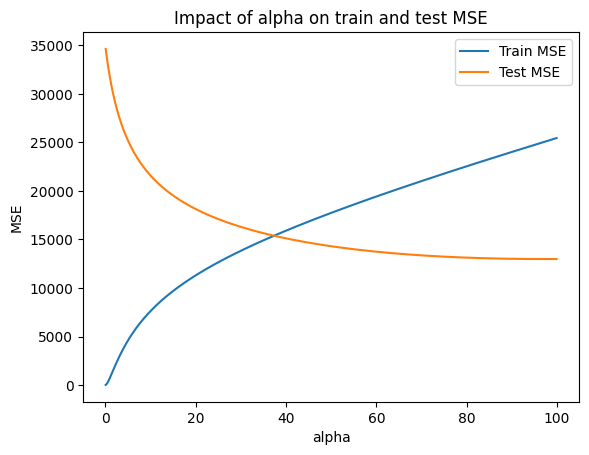

In [109]:
import matplotlib.pyplot as plt
plt.plot(alphas, tr, label='Train MSE')
plt.plot(alphas, ts, label='Test MSE')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.title('Impact of alpha on train and test MSE')
plt.show

## optimal value of alpha set manually

In [110]:
for i  in alphas:
    rr = Ridge(alpha=i)
    rr.fit(xtrain, ytrain)
    ypred_tr = rr.predict(xtrain)
    ypred_ts = rr.predict(xtest)
    tr = mean_squared_error(ytrain, ypred_tr)
    ts = mean_squared_error(ytest, ypred_ts)
    if tr>=ts:
        opt_alpha = i
        print("Optimal alpha value: ", opt_alpha)
        break

Optimal alpha value:  37.400000000000006


In [111]:
rr = Ridge(alpha=opt_alpha)
rr.fit(xtrain, ytrain)
evaluate_model(xtrain, xtest, ytrain, ytest, rr)

Metrics of Train Data
MSE: 15395.27
MAE: 89.88
RMSE: 124.08
R2: 0.96


Metrics of Test Data
MSE: 15379.36
MAE: 103.38
RMSE: 124.01
R2: 0.93


# predict the sample dataset weights

In [112]:
sample = pd.read_csv('Datasets/sample.csv')
sample.head()

,Id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,94,Honda,PreludeS,Sporty,17.9,18.6,20.5,26,32,Driver & Passenger,...,4,188,102,68,36,22.6,7.7,2997,non-USA,Honda PreludeS
1,95,Dodge,ColtZ,Small,8.0,9.0,11.6,31,34,NaN,...,5,172,92,71,32,26.8,11.4,2106,USA,Dodge ColtZ
2,96,Mazda,MPVX,Van,16.7,18.0,23.6,18,25,NaN,...,7,179,108,78,38,25.4,NaN,3628,non-USA,Mazda MPVX
3,97,Pontiac,LeMansPlus,Small,7.8,9.3,8.9,30,39,NaN,...,4,168,92,62,35,25.0,15.5,2234,USA,Pontiac LeMansPlus
4,98,Acura,IntegraS,Small,12.3,15.9,18.1,24,28,NaN,...,5,168,95,68,41,25.1,11.4,2847,non-USA,Acura IntegraS


In [113]:
sample.isna().sum()

Id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               6
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          2
Weight                0
Origin                0
Make                  0
dtype: int64

In [114]:
sample.drop(columns=['Id','Weight'])

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Honda,PreludeS,Sporty,17.9,18.6,20.5,26,32,Driver & Passenger,Front,...,14.7,4,188,102,68,36,22.6,7.7,non-USA,Honda PreludeS
1,Dodge,ColtZ,Small,8.0,9.0,11.6,31,34,NaN,Front,...,12.2,5,172,92,71,32,26.8,11.4,USA,Dodge ColtZ
2,Mazda,MPVX,Van,16.7,18.0,23.6,18,25,NaN,4WD,...,19.4,7,179,108,78,38,25.4,NaN,non-USA,Mazda MPVX
3,Pontiac,LeMansPlus,Small,7.8,9.3,8.9,30,39,NaN,Front,...,12.6,4,168,92,62,35,25.0,15.5,USA,Pontiac LeMansPlus
4,Acura,IntegraS,Small,12.3,15.9,18.1,24,28,NaN,Front,...,14.3,5,168,95,68,41,25.1,11.4,non-USA,Acura IntegraS
5,Dodge,DynastyX,Midsize,14.0,16.5,16.3,23,26,Driver only,Front,...,16.6,6,206,101,65,44,32.4,15.5,USA,Dodge DynastyX
6,Geo,StormS,Sporty,11.9,12.2,14.7,28,35,Driver only,Front,...,12.8,4,174,98,67,35,22.5,11.9,non-USA,Geo StormS
7,Oldsmobile,AchievaGT,Compact,12.2,12.9,14.6,26,33,NaN,Front,...,16.1,5,194,105,65,42,30.7,13.4,USA,Oldsmobile AchievaGT
8,Cadillac,SevilleS,Midsize,38.9,41.3,40.3,17,24,Driver & Passenger,Front,...,20.6,5,207,102,72,42,29.4,15.3,USA,Cadillac SevilleS
9,Hyundai,ElantraZ,Small,8.9,9.7,11.3,23,31,NaN,Front,...,12.4,5,189,97,63,39,29.4,13.1,non-USA,Hyundai ElantraZ


## seperate the cat con features

In [115]:
# cat_smp,con_smp = catconsep(sample)

## preprocess data

In [116]:
# num_pipeline1 = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
#                                 ('scaler',StandardScaler())])
# cat_pipeline2 = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
#                                 ('Ohe',OneHotEncoder(handle_unknown='ignore'))])
# pre1 = ColumnTransformer([('num', num_pipeline1, con_smp),
#                           ('cat', cat_pipeline2, cat_smp)])

In [119]:
smp_pre = pre.transform(sample).toarray()
smp_pre

array([[ 0.08899922, -0.0946855 , -0.12751122, ...,  0.        ,
         0.        ,  0.        ],
       [-1.0490783 , -1.09391976, -0.93874135, ...,  0.        ,
         0.        ,  0.        ],
       [-0.04894957, -0.15713765,  0.15505208, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.94561671, -1.02105893, -0.96608618, ...,  0.        ,
         0.        ,  0.        ],
       [-1.06057403, -0.91697203, -1.01166091, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22138556,  0.12389699,  0.4011556 , ...,  0.        ,
         0.        ,  0.        ]], shape=(12, 256))

In [120]:
sample = pd.DataFrame(smp_pre, columns=cols)
sample.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,0.088999,-0.094686,-0.127511,0.650219,0.549498,-0.259498,0.483222,0.042720,0.894631,-0.602300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.049078,-1.093920,-0.938741,1.544751,0.926644,-1.228705,-1.071717,0.283657,2.208849,-1.368773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.048950,-0.157138,0.155052,-0.781032,-0.770514,0.515869,0.291254,-0.816568,-0.545136,0.838670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.072070,-1.062694,-1.184845,1.365844,1.869510,-1.131784,-1.321275,0.509431,1.858526,-1.246137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.554762,-0.375720,-0.346270,0.292406,-0.204794,-0.841022,-0.073484,0.765532,0.870331,-0.724935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## predict the weight of the sample cars

In [122]:
smp_predict = rr.predict(sample)
smp_predict

array([2827.92399175, 2332.21398579, 3608.54879031, 2136.48767559,
       2781.53908083, 3131.79893187, 2475.32140561, 2929.00267138,
       3766.38993379, 2631.50512376, 2221.75727121, 3926.21680782])

In [127]:
smp = pd.read_csv('Datasets/sample.csv')
smp_weights = smp[['Weight']]

In [128]:
smp_weights

,Weight
0,2997
1,2106
2,3628
3,2234
4,2847
5,2831
6,2673
7,2797
8,3851
9,2531


In [130]:
rr.score(smp_weights, smp_predict)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Weight
Feature names seen at fit time, yet now missing:
- cat__AirBags_Driver & Passenger
- cat__AirBags_Driver only
- cat__Cylinders_3
- cat__Cylinders_4
- cat__Cylinders_5
- ...
